<a href="https://colab.research.google.com/github/SURESHASWATHI/assignment/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('sales_data_with_discounts.csv')

# Display the first few rows and column data types
display(df.head())
display(df.info())

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


None

In [2]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numerical columns:", numerical_cols)

Numerical columns: ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']


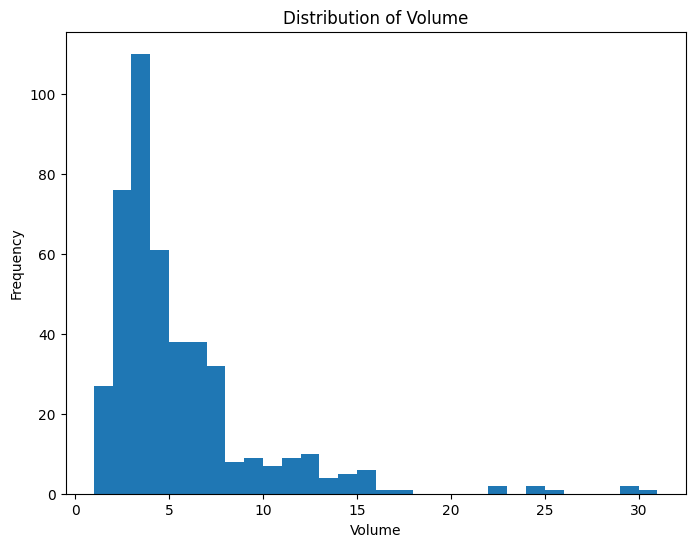

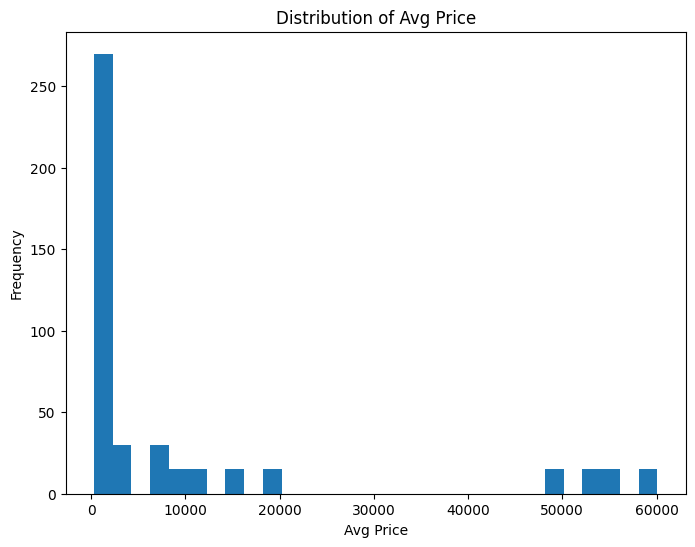

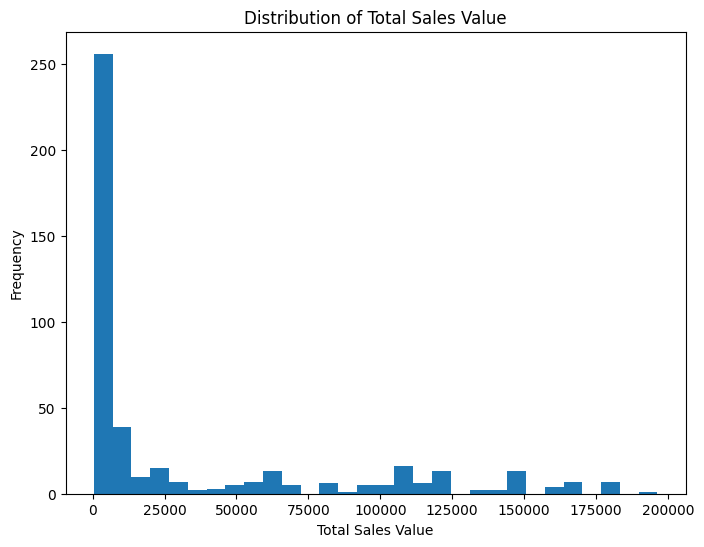

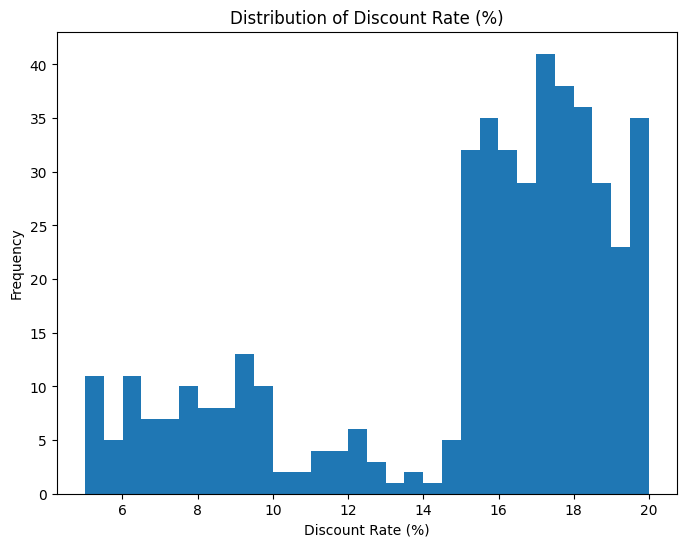

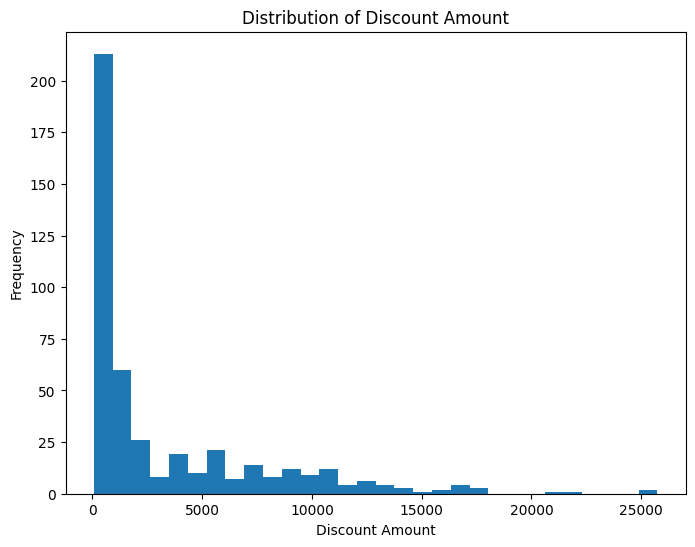

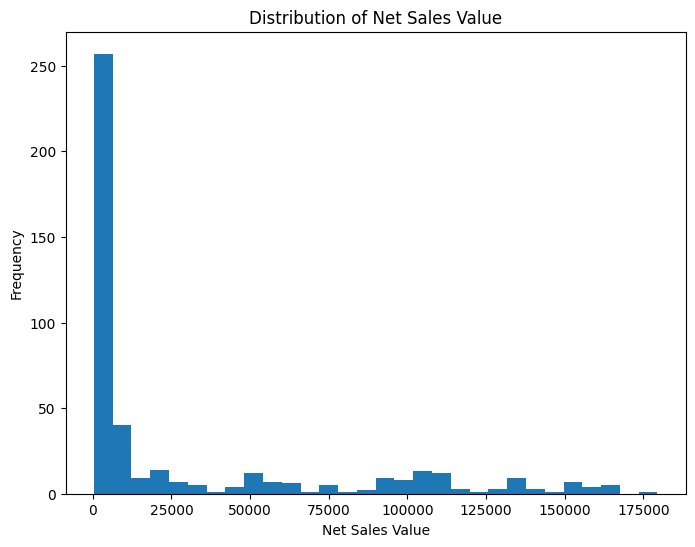

In [3]:
import matplotlib.pyplot as plt

numerical_cols = ['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)', 'Discount Amount', 'Net Sales Value']

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=30)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {col}')
    plt.show()

In [4]:
# Calculate and display skewness for each numerical column
skewness = df[numerical_cols].skew()
print("\nSkewness of numerical columns:")
print(skewness)


Skewness of numerical columns:
Volume               2.731724
Avg Price            1.908873
Total Sales Value    1.534729
Discount Rate (%)   -1.062294
Discount Amount      1.913038
Net Sales Value      1.540822
dtype: float64


In [5]:
# Calculate the IQR and bounds for outlier detection
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("\nInterquartile Range (IQR):")
print(IQR)

print("\nLower Bound for Outliers:")
print(lower_bound)

print("\nUpper Bound for Outliers:")
print(upper_bound)

# Identify potential outliers
outliers = {}
for col in numerical_cols:
    outliers[col] = df[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col])].index.tolist()

print("\nIndices of potential outliers:")
print(outliers)


Interquartile Range (IQR):
Volume                   3.000000
Avg Price             9635.000000
Total Sales Value    50500.000000
Discount Rate (%)        4.149656
Discount Amount       4856.036123
Net Sales Value      45645.704206
dtype: float64

Lower Bound for Outliers:
Volume                  -1.500000
Avg Price           -13987.500000
Total Sales Value   -73050.000000
Discount Rate (%)        7.740579
Discount Amount      -6823.594880
Net Sales Value     -66266.347664
dtype: float64

Upper Bound for Outliers:
Volume                   10.500000
Avg Price             24552.500000
Total Sales Value    128950.000000
Discount Rate (%)        24.339202
Discount Amount       12600.549611
Net Sales Value      116316.469161
dtype: float64

Indices of potential outliers:
{'Volume': [0, 10, 30, 40, 50, 70, 71, 80, 100, 101, 102, 130, 140, 161, 170, 180, 190, 192, 193, 200, 201, 210, 221, 222, 240, 250, 251, 260, 280, 281, 282, 300, 310, 312, 320, 340, 350, 370, 371, 390, 400, 410, 420, 431],

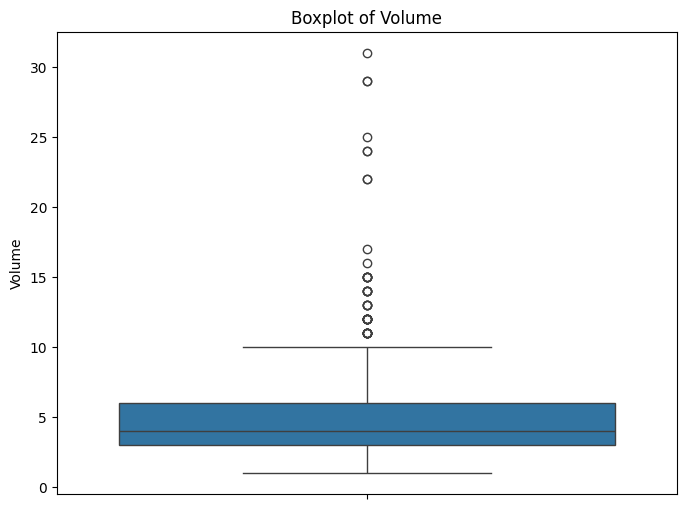

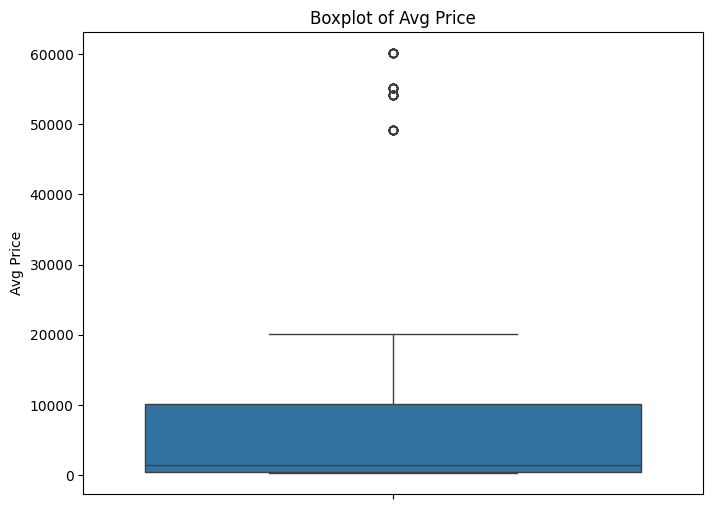

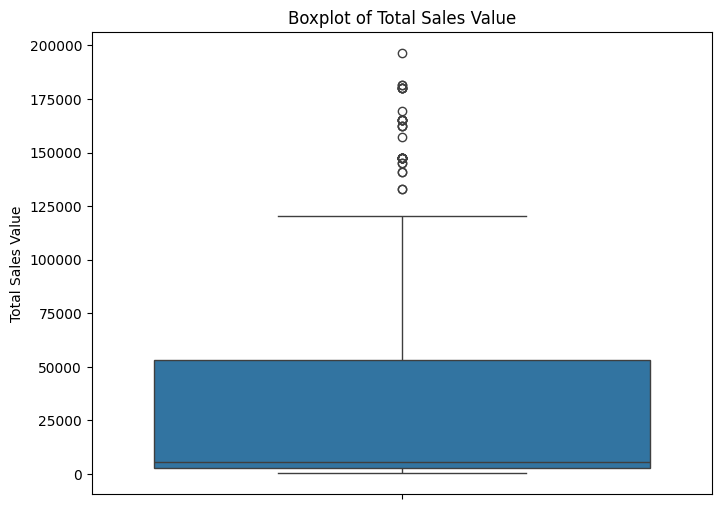

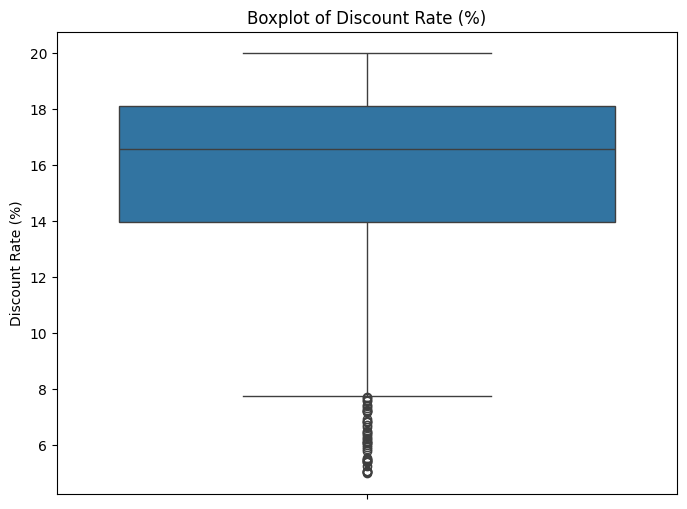

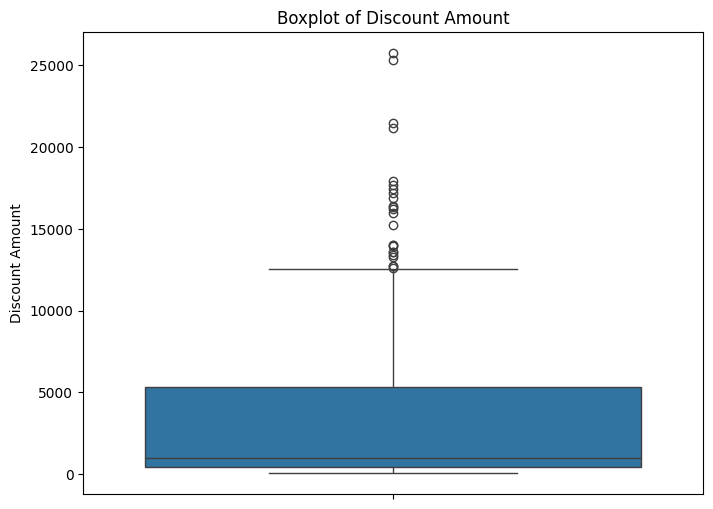

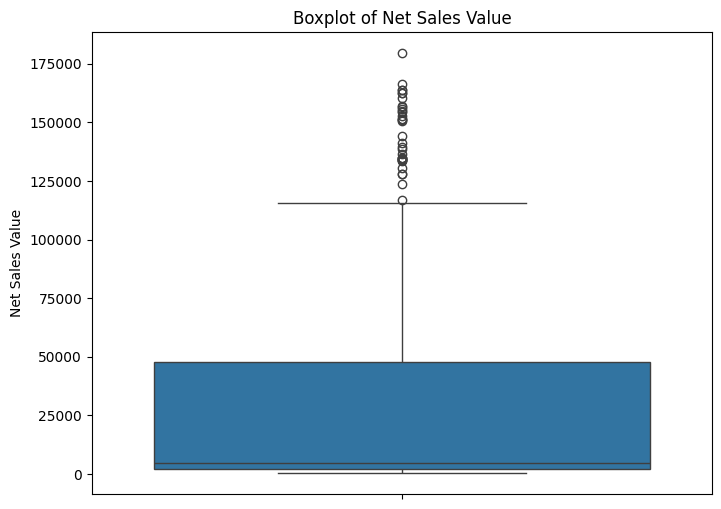

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for numerical variables
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.show()

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']


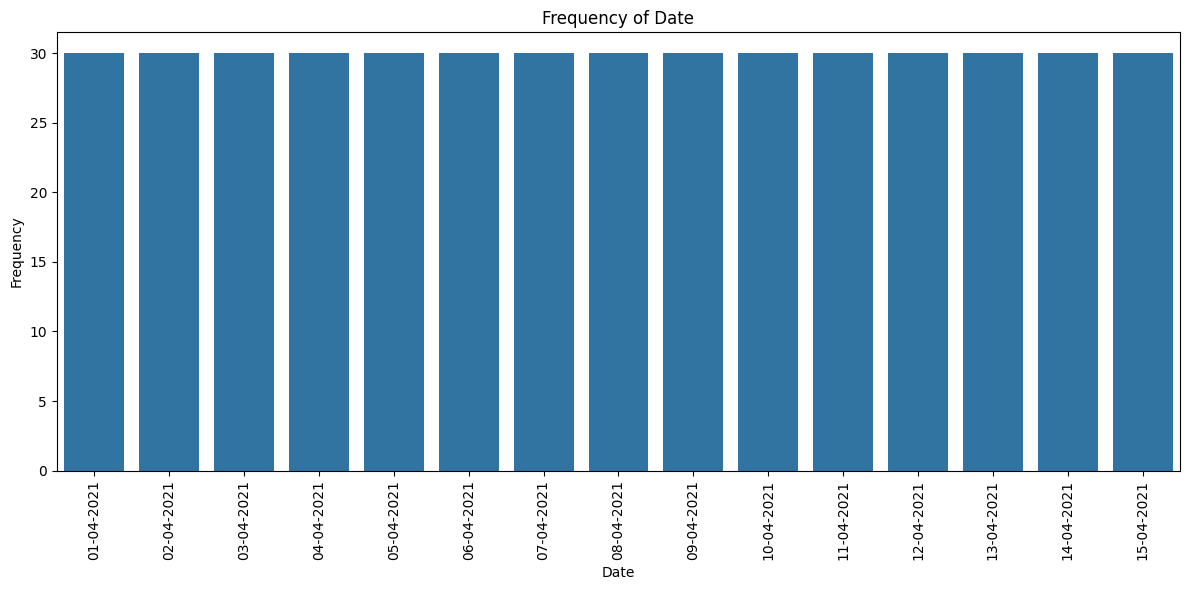

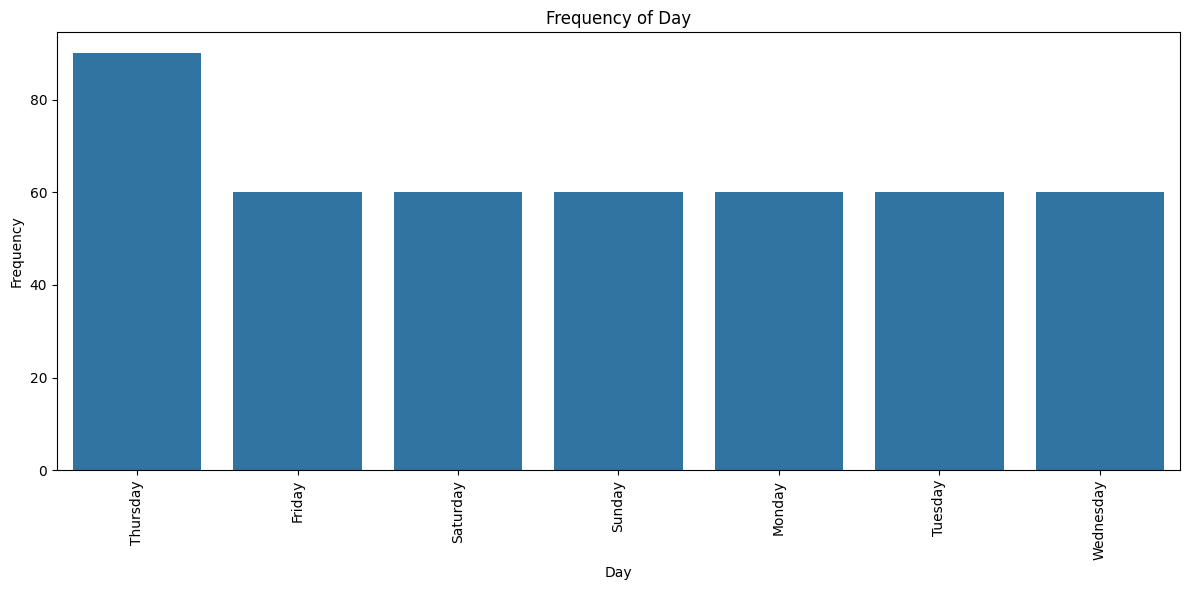

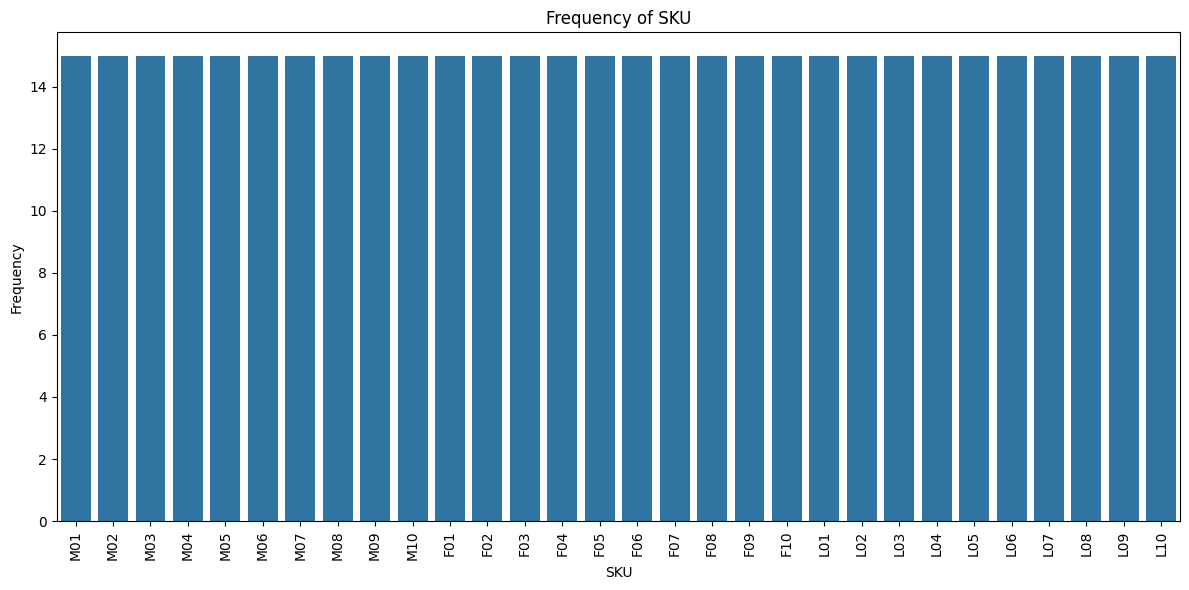

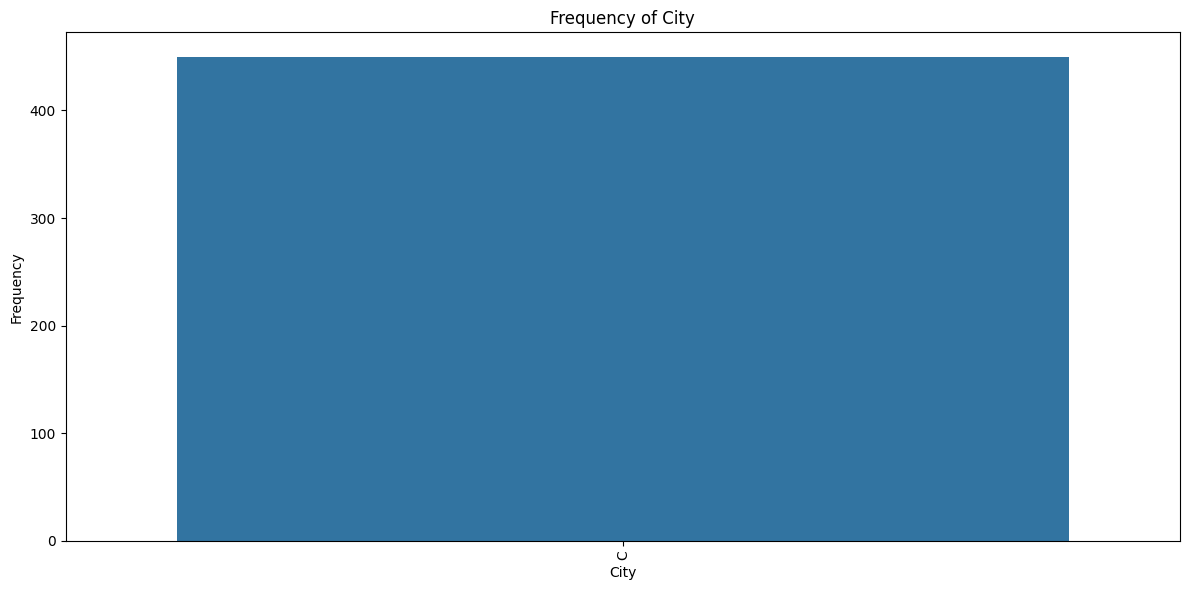

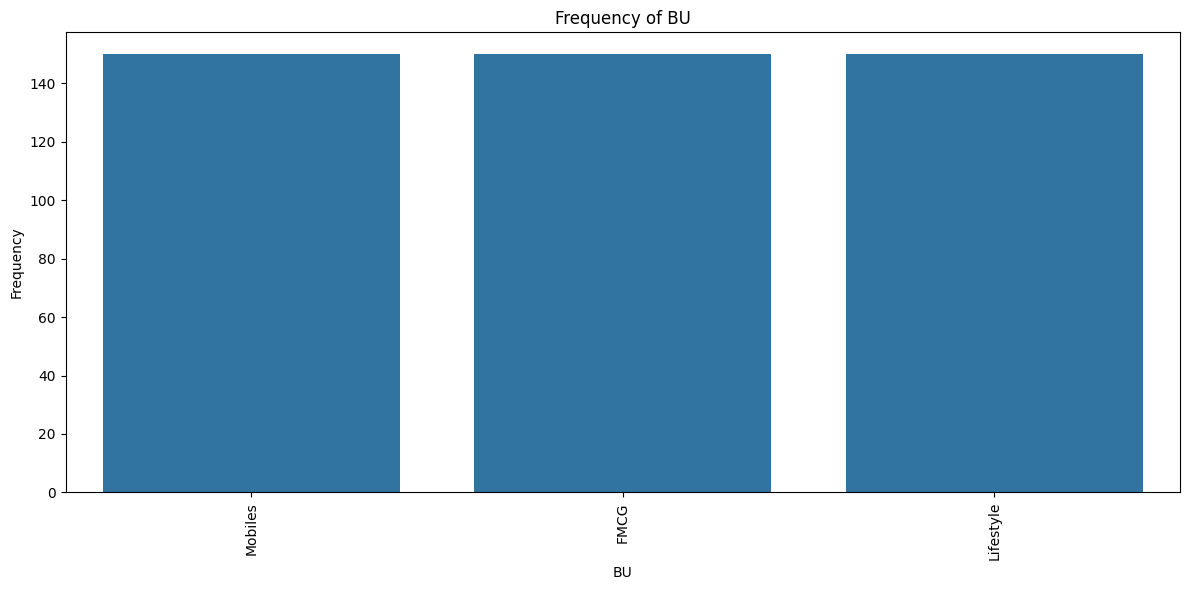

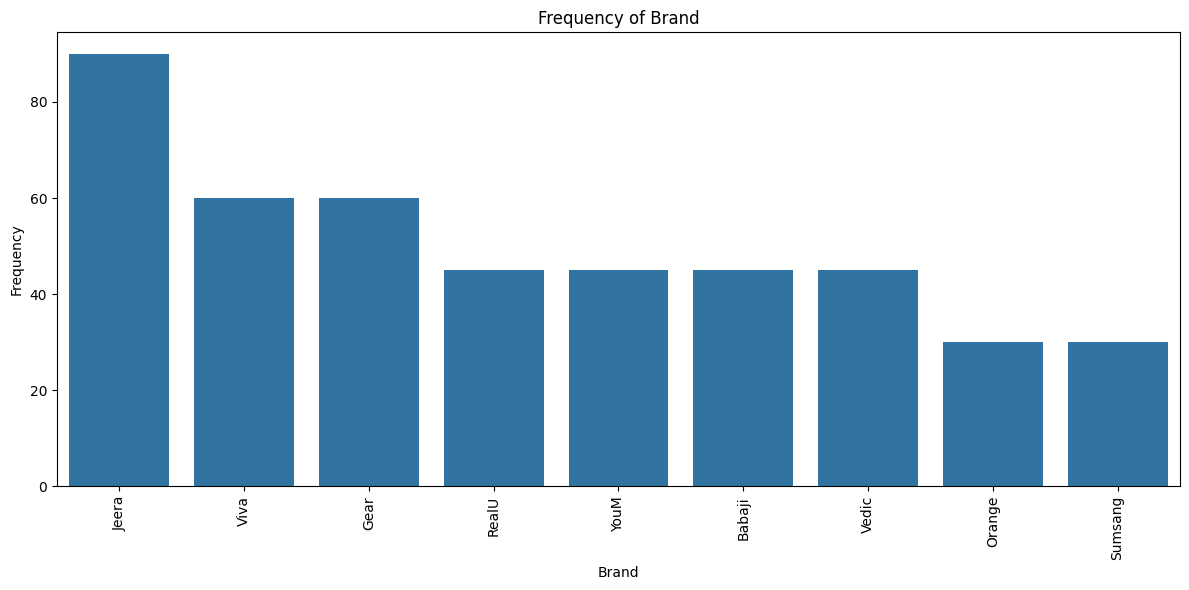

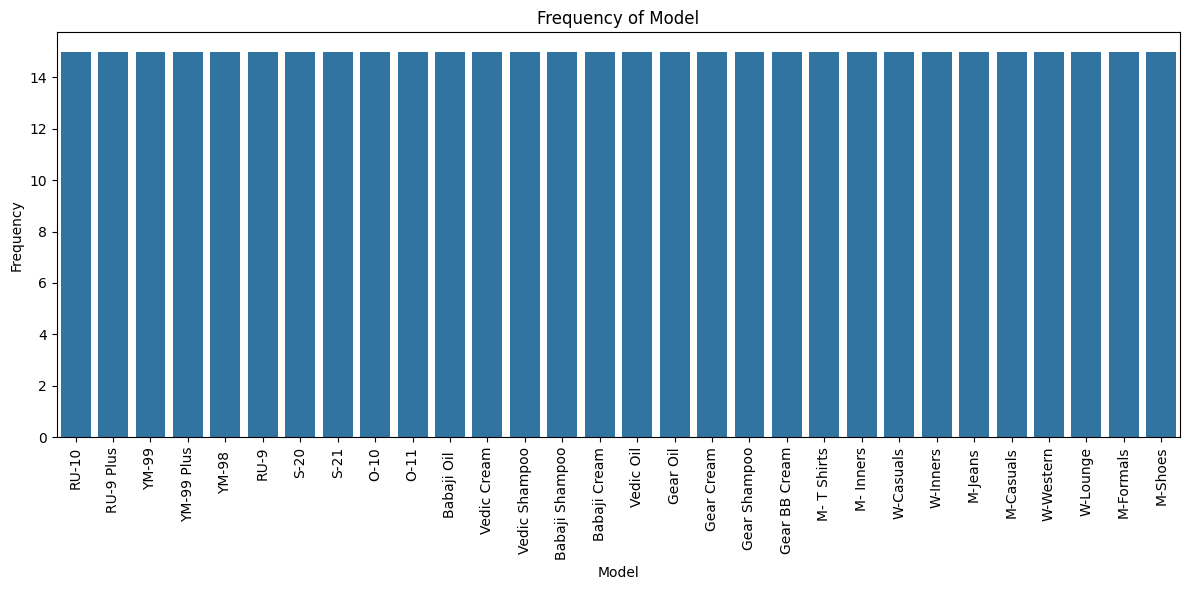

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Frequency of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the numerical columns
df_scaled = df.copy()  # Create a copy to avoid modifying the original DataFrame
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

display(df_scaled.head())

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,2.350029,Mobiles,RealU,RU-10,0.091173,2.925721,-0.830289,3.952816,2.804756
1,01-04-2021,Thursday,M02,C,1.167129,Mobiles,RealU,RU-9 Plus,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,01-04-2021,Thursday,M03,C,0.457388,Mobiles,YouM,YM-99,0.312659,1.562775,-1.351631,1.622995,1.545675
3,01-04-2021,Thursday,M04,C,0.220808,Mobiles,YouM,YM-99 Plus,0.534146,1.719276,-1.949723,1.113807,1.765810
4,01-04-2021,Thursday,M05,C,-0.488932,Mobiles,YouM,YM-98,-0.130313,-0.188452,0.673739,0.227852,-0.227595


In [10]:
# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True) # drop_first=True to avoid multicollinearity

# Display a portion of the transformed dataset
display(df_encoded.head())

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Summary of Key Findings and Reflection on Data Preprocessing

**Key Findings from Descriptive Analytics and Data Visualizations:**

From the descriptive analytics and visualizations, we observed the following key characteristics of the dataset:

*   **Numerical Columns:**
    *   Most numerical columns ('Volume', 'Avg Price', 'Total Sales Value', 'Discount Amount', 'Net Sales Value') exhibit right-skewed distributions, indicating the presence of higher values that are less frequent.
    *   'Discount Rate (%)' shows a left-skewed distribution, suggesting that higher discount rates are less common.
    *   Boxplots and IQR analysis confirmed the presence of potential outliers in most numerical columns, particularly in those with right-skewed distributions. These outliers might represent unusual sales events or data entry errors.
*   **Categorical Columns:**
    *   The bar charts revealed the frequency distribution of categories within each categorical column ('Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'). This helped us understand the most frequent occurrences in each category (e.g., which days had the most sales, which cities had the highest volume, which brands or models were most popular).
    *   Some categorical columns, like 'SKU' and 'Model', have a large number of unique categories, which is important to consider for modeling.

**Reflection on the Importance of Data Preprocessing:**

This analysis highlights the crucial role of data preprocessing steps like standardization and one-hot encoding in preparing data for analysis and machine learning:

*   **Standardization (Z-score Normalization):** We saw that numerical features had different scales and distributions. Standardizing these features is vital for many machine learning algorithms that are sensitive to the magnitude of input values. By centering the data around zero and scaling by the standard deviation, standardization ensures that no single feature disproportionately influences the model based on its scale. This can lead to improved model performance and faster convergence during training.
*   **One-Hot Encoding:** Categorical variables, while containing valuable information, cannot be directly used by most machine learning algorithms. One-hot encoding provides a way to convert these categorical features into a numerical format (binary vectors) that algorithms can understand. This process avoids imposing an artificial ordinal relationship between categories and allows the model to learn from the distinct nature of each category. Handling categorical data appropriately is essential for building accurate and reliable models.

In summary, descriptive analytics and data visualization provide valuable insights into the structure and characteristics of the data, including identifying issues like skewness and outliers. Data preprocessing techniques like standardization and one-hot encoding are then necessary steps to transform the raw data into a format suitable for analysis and machine learning, addressing issues of scale and categorical representation to ensure effective model building.